### BCE Loss with Logits

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [4]:
# load the data
data = load_breast_cancer()

In [6]:
# this acts like a dictionary to treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# 'data' Shape
data.data.shape

(569, 30)

In [8]:
# 'targets'
data.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
# targe name
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
# Shape of the targets
data.target.shape

(569,)

In [11]:
# Each feature
data.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# import library
from sklearn.model_selection import train_test_split


# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [13]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Build the model
model = nn.Linear(D, 1)

In [15]:
# Loss and optimizer using BCE WITH Logits
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [16]:
# Convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [17]:
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_acc = np.zeros(n_epochs)
test_acc = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.4230, Test Loss: 0.4096
Epoch 100/1000, Train Loss: 0.3225, Test Loss: 0.3164
Epoch 150/1000, Train Loss: 0.2667, Test Loss: 0.2623
Epoch 200/1000, Train Loss: 0.2306, Test Loss: 0.2252
Epoch 250/1000, Train Loss: 0.2052, Test Loss: 0.1979
Epoch 300/1000, Train Loss: 0.1862, Test Loss: 0.1768
Epoch 350/1000, Train Loss: 0.1714, Test Loss: 0.1603
Epoch 400/1000, Train Loss: 0.1597, Test Loss: 0.1469
Epoch 450/1000, Train Loss: 0.1500, Test Loss: 0.1360
Epoch 500/1000, Train Loss: 0.1420, Test Loss: 0.1268
Epoch 550/1000, Train Loss: 0.1352, Test Loss: 0.1191
Epoch 600/1000, Train Loss: 0.1294, Test Loss: 0.1124
Epoch 650/1000, Train Loss: 0.1244, Test Loss: 0.1066
Epoch 700/1000, Train Loss: 0.1199, Test Loss: 0.1016
Epoch 750/1000, Train Loss: 0.1160, Test Loss: 0.0971
Epoch 800/1000, Train Loss: 0.1125, Test Loss: 0.0931
Epoch 850/1000, Train Loss: 0.1094, Test Loss: 0.0896
Epoch 900/1000, Train Loss: 0.1065, Test Loss: 0.0863
Epoch 950/1000, Train Loss: 0

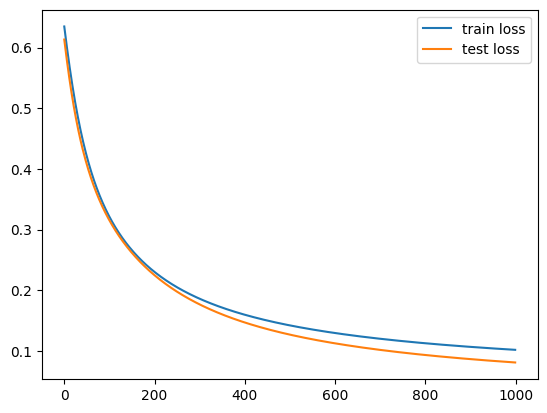

In [18]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [19]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = (p_train.numpy() > 0)
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = (p_test.numpy() > 0)
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9790, Test acc: 1.0000
